# Project: Investigate arms sales in the U.S.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project I've taken data on background checks. The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from www.census.gov. Census data provides some social-economical indicators for each state.

This project will cover the following questions:
<ul>
    <li> What is general trend for arms sales in the U.S.?</li>
    <li> Which states has the highest number of arms sold?</li>
    <li> What social-economic factors may contribute to high per-capita arms sales?</li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# load the FBI data
df_fbi = pd.read_excel('gun_data.xlsx')
# load the U.S. census data
df_census = pd.read_csv('U.S. Census Data.csv')

In [3]:
df_fbi.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
df_fbi.tail(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


In [5]:
df_fbi.shape

(12485, 27)

In [6]:
df_fbi.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [7]:
df_fbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

As we can see the FBI dataset contains per month data for various types of background checks from November 1998 to December 2017. There is some missing data in particular in columns for private sales and rentals.

Now let's see what we've got in census data:

In [8]:
df_census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [9]:
df_census.shape

(85, 52)

In [10]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [11]:
# we need to set this options to view all the facts.
pd.options.display.max_rows = 100
pd.set_option('max_colwidth', 200)

In [12]:
df_census['Fact']

0                                               Population estimates, July 1, 2016,  (V2016)
1                                         Population estimates base, April 1, 2010,  (V2016)
2      Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)
3                                                          Population, Census, April 1, 2010
4                                     Persons under 5 years, percent, July 1, 2016,  (V2016)
5                                              Persons under 5 years, percent, April 1, 2010
6                                    Persons under 18 years, percent, July 1, 2016,  (V2016)
7                                             Persons under 18 years, percent, April 1, 2010
8                                Persons 65 years and over, percent,  July 1, 2016,  (V2016)
9                                          Persons 65 years and over, percent, April 1, 2010
10                                          Female persons, percent,  

Census data is a collection of various social and economic indicators for each state. Some factors given for census of 2010 while others for census of 2016. Column 1 is indicators themselves and columns from 3rd to 52nd are states. There is some missing data, but we will take only a few most interesting indicators for our research, we will see if we are missing some crucial data in Data Cleaning section.

### Data Cleaning

The FBI data is not gun sales per se, but only background checks performed by governmental agencies, as described here - https://github.com/NYTimes/gunsales#getting-gun-sales-estimates-from-background-checks the best way to estimate actual gun sales: Each long gun and handgun check count as 1.1 sales. Each multiple-gun check count as two sales. Permit checks and other types of checks is to be omitted. The multiplier is an estimate based on interviews with gun shop owners.

Before we do a calculation for estimated gun sales we need to handle our missing data in columns 'handgun', 'long_gun'. Let's see which rows have missing data:

In [13]:
# For 'long_gun' situation is similar
df_fbi[df_fbi['handgun'].isnull()]

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
7914,2005-10,Virgin Islands,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7969,2005-09,Virgin Islands,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8024,2005-08,Virgin Islands,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8079,2005-07,Virgin Islands,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8134,2005-06,Virgin Islands,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8189,2005-05,Virgin Islands,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8244,2005-04,Virgin Islands,NaN,NaN,NaN,1.0,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8299,2005-03,Virgin Islands,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8354,2005-02,Virgin Islands,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8409,2005-01,Virgin Islands,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


It seems that we are missing some old data for incorporated territories of the U.S. we can safely replace it with zeros.  

In [14]:
df_fbi.fillna(0, inplace=True)

Let's calculate gun sales estimation as we discussed earlier:

In [15]:
df_fbi['estimated_sales'] = (df_fbi['handgun'] + df_fbi['long_gun']) * 1.1 + (df_fbi['multiple'] * 2)

Since all other types of checks are not relevant to our research let's drop them:

In [16]:
df_fbi = df_fbi[['month', 'state', 'estimated_sales']]

For convenience let’s convert month column to datetime:

In [17]:
df_fbi.loc[:,'month'] = pd.to_datetime(df_fbi['month'])

Now let's handle the census data, what we need is to select a few key indicators namely: **Population estimates (2016)**, **Bachelor's degree or higher, percent of persons age 25 years**, **Per capita income in past 12 months**, **Persons in poverty**.

Let's drop everything else:

In [18]:
# Selecting only relevant facts
df_census = df_census.loc[[0, 25, 35, 48, 49], :]
# Droping 'Fact Note' column 
df_census.drop('Fact Note', axis=1, inplace=True)

Check for missing data:

In [19]:
df_census.isnull().any()

Fact              False
Alabama           False
Alaska            False
Arizona           False
Arkansas          False
California        False
Colorado          False
Connecticut       False
Delaware          False
Florida           False
Georgia           False
Hawaii            False
Idaho             False
Illinois          False
Indiana           False
Iowa              False
Kansas            False
Kentucky          False
Louisiana         False
Maine             False
Maryland          False
Massachusetts     False
Michigan          False
Minnesota         False
Mississippi       False
Missouri          False
Montana           False
Nebraska          False
Nevada            False
New Hampshire     False
New Jersey        False
New Mexico        False
New York          False
North Carolina    False
North Dakota      False
Ohio              False
Oklahoma          False
Oregon            False
Pennsylvania      False
Rhode Island      False
South Carolina    False
South Dakota    

Good news: all the data is present.

In [20]:
df_census.dtypes

Fact              object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object
Rhode Island      object


Bad news: everything is a string, we will need to convert it for further use.

First we will deal with Population estimates:

In [21]:
# Remove commas in strings
df_census.iloc[0, 1:] = df_census.iloc[0, 1:].apply(lambda x: x.replace(',', ''))
# Cast strings as integers
df_census.iloc[0, 1:] = df_census.iloc[0, 1:].astype(int)

Next we deal with median value of housing units and per capita income for that lets define helper function:

In [22]:
def convert_dollar_amounts(target):
    # Remove dollar marks
    without_dollar = target.apply(lambda x: x.replace('$', ''))
    # Remove commas in strings
    without_comma = without_dollar.apply(lambda x: x.replace(',', ''))
    # Cast strings as integers
    as_integer = without_comma.astype(int)
    return as_integer

In [23]:
df_census.iloc[1, 1:] = convert_dollar_amounts(df_census.iloc[1, 1:])
df_census.iloc[3, 1:] = convert_dollar_amounts(df_census.iloc[3, 1:])

Now let's deal with percent of bachelor's degree and persons in poverty, again we will define helper function. Here however there is one issue the format is different for some states its '23.50%' for others '0.27'. We need to take it into account:

In [24]:
def convert_percents(value):
    # Remove % sign
    new_value = float(value.replace('%', ''))
    # Deal with different formats
    if new_value < 1:
        new_value *= 100
    return new_value

In [25]:
df_census.iloc[2, 1:] = df_census.iloc[2, 1:].apply(convert_percents)
df_census.iloc[4, 1:] = df_census.iloc[4, 1:].apply(convert_percents)

In [26]:
# Convert to pandas native datatypes
df_census = df_census.apply(pd.to_numeric, errors='ignore')

Now we need to transpose our dataframe so the states will become indexes and indicators will become columns:

In [27]:
df_census = df_census.set_index('Fact').transpose()

Let's shorten column names for convenience:

In [28]:
df_census.rename(columns={'Population estimates, July 1, 2016,  (V2016)': 'population',
                'Median value of owner-occupied housing units, 2011-2015': 'median house value',
                "Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015": "percent of Bachelor's",
                'Per capita income in past 12 months (in 2015 dollars), 2011-2015': 'per capita income',
                'Persons in poverty, percent':'poverty, percent'}, inplace=True)

Let's check our cleaned data and continue to next section:

In [29]:
df_census.head()

Fact,population,median house value,percent of Bachelor's,per capita income,"poverty, percent"
Alabama,4863300.0,125500.0,23.5,24091.0,17.1
Alaska,741894.0,250000.0,28.0,33413.0,9.9
Arizona,6931071.0,167500.0,27.5,25848.0,16.4
Arkansas,2988248.0,111400.0,21.1,22798.0,17.2
California,39250017.0,385500.0,31.4,30318.0,14.3


In [30]:
df_census.columns

Index(['population', 'median house value', 'percent of Bachelor's',
       'per capita income', 'poverty, percent'],
      dtype='object', name='Fact')

<a id='eda'></a>
## Exploratory Data Analysis

### General trend in U.S. arms sales 

Let's sum up sales by month:

In [31]:
monthly_sales_data = df_fbi.groupby('month').sum()

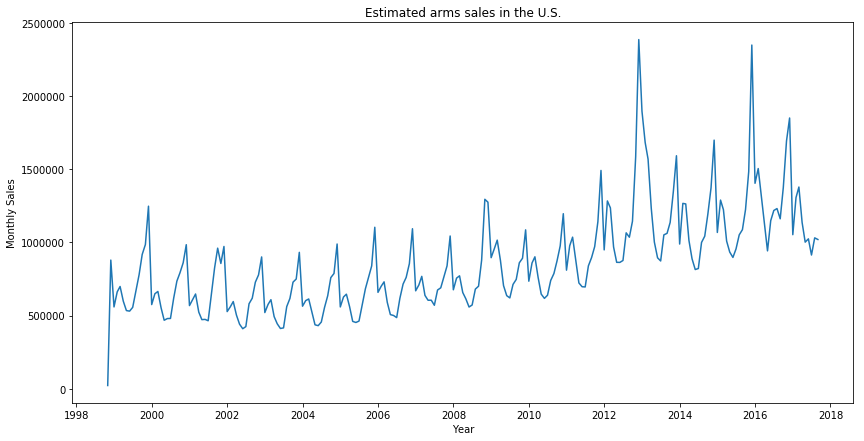

In [32]:
fig, ax = plt.subplots(figsize=(14,7))
ax.set(xlabel='Year', ylabel='Monthly Sales',
       title='Estimated arms sales in the U.S.')
ax.plot(monthly_sales_data)

Well this is a lot of seasonality we need to adjust it, let's use a rolling mean with a 12 months window:

In [33]:
rolling_monthly_sales = monthly_sales_data.rolling(12).mean()

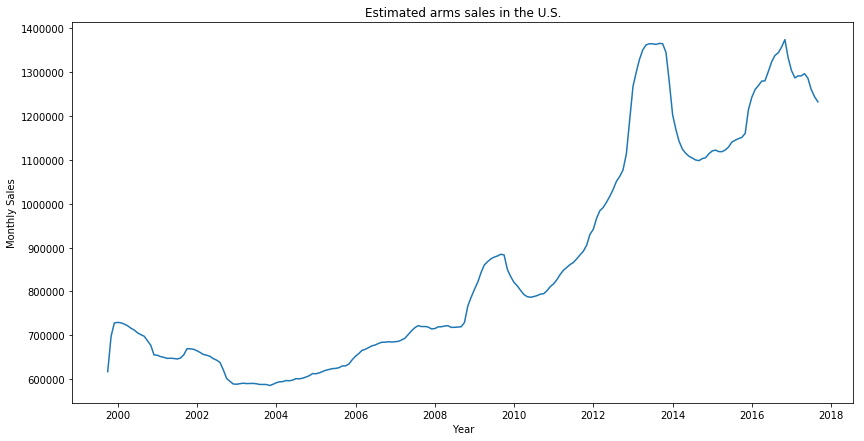

In [34]:
fig, ax = plt.subplots(figsize=(14,7))
ax.set(xlabel='Year', ylabel='Monthly Sales',
       title='Estimated arms sales in the U.S.')
ax.plot(rolling_monthly_sales)

As we can see monthly sales of weapons in the U.S. tend to rise and almost doubled within past 20 years. We can clearly distinguish three peaks around years 2009, 2013 and 2017.

### Which states have the highest arms sales?

In [35]:
total_arms_sold_per_state = df_fbi.groupby('state').sum().sort_values(by='estimated_sales', ascending=False)
total_arms_sold_per_state[0:5]

,estimated_sales
state,
Texas,16295674.8
California,13448143.0
Pennsylvania,12823405.7
Florida,11198350.2
Ohio,8539790.2


Above we can see top 5 states ranked by estimated arms sales for the discussed period.

<BarContainer object of 55 artists>

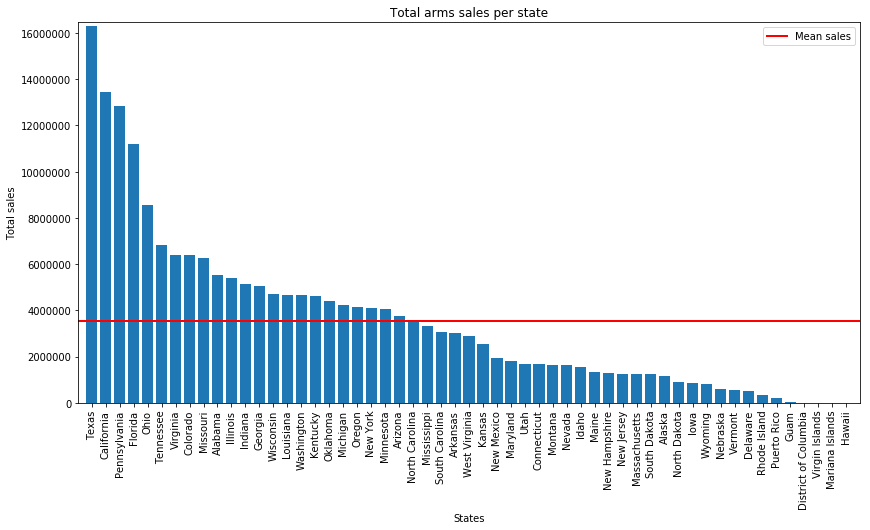

In [36]:
fig, ax = plt.subplots(figsize=(14,7))
ax.set(xlabel='States', ylabel='Total sales',
       title='Total arms sales per state')
xlabels = total_arms_sold_per_state.index
ax.set_xticklabels(xlabels, rotation=90)
ax.margins(0.01, 0.01)
ax.ticklabel_format(axis='y', style='plain')
ax.axhline(total_arms_sold_per_state['estimated_sales'].mean(), color='red', linewidth=2, label='Mean sales')
plt.legend()
ax.bar(total_arms_sold_per_state.index, total_arms_sold_per_state['estimated_sales'])

The difference between sales in top-5 states: Texas, California, Pennsylvania, Florida, Ohio and the mean sales is significant.

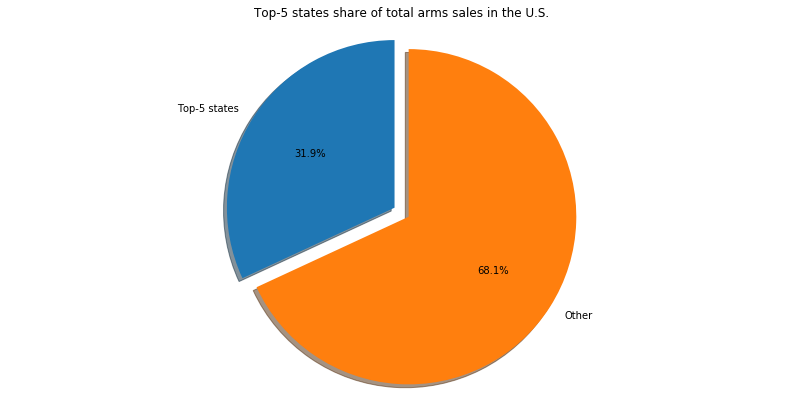

In [37]:
labels = 'Top-5 states', 'Other'
top_5_proportion = total_arms_sold_per_state[0:5].sum() / total_arms_sold_per_state.sum()
sizes = [top_5_proportion, 1 - top_5_proportion]
explode = (0.1, 0)

fig, ax = plt.subplots(figsize=(14,7))
ax.set(title='Top-5 states share of total arms sales in the U.S.')
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.show()

From this graph we can see that top-5 states account for 31.9% of total arms sales in the U.S.

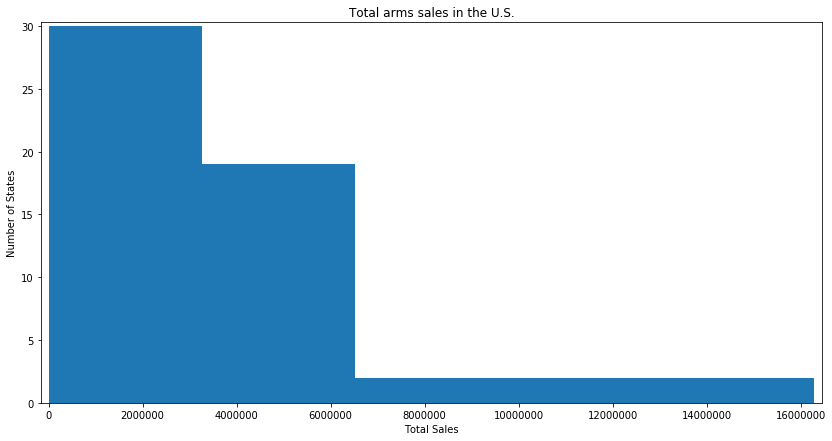

In [38]:
fig, ax = plt.subplots(figsize=(14,7))
ax.set(title='Total arms sales in the U.S.', xlabel='Total Sales', ylabel='Number of States')
ax.ticklabel_format(axis='x', style='plain')
ax.margins(0.01, 0.01)
ax.hist(total_arms_sold_per_state['estimated_sales'], 5)
plt.show()

The distribution of total sales by state is highly skewed to the right, due to the fact that top-5 states account for 31.9% of total sales.

### What factors may contribute for high per capita arms sales?

First things first, let's figure out per capita arms sales using FBI dataset and census dataset:

In [39]:
# Drop U.S. territories and D.C. because we lack census data:
not_states = ['District of Columbia', 'Puerto Rico', 'Guam', 'Virgin Islands', 'Mariana Islands']
total_arms_sold_per_state.drop(not_states, axis=0, inplace=True)

Let's merge total arms sales and census dataframes together:

In [40]:
df_sales_and_census = total_arms_sold_per_state.merge(df_census, left_index=True, right_index=True, how='inner')

Let's calculate per capita sales, for that we divide number of arms sold by the total population and check result:

In [41]:
df_sales_and_census['sales per capita'] = df_sales_and_census['estimated_sales'] / df_sales_and_census['population']

In [42]:
df_sales_and_census.head()

,estimated_sales,population,median house value,percent of Bachelor's,per capita income,"poverty, percent",sales per capita
Texas,16295674.8,27862596.0,136000.0,27.6,26999.0,15.6,0.584858
California,13448143.0,39250017.0,385500.0,31.4,30318.0,14.3,0.342628
Pennsylvania,12823405.7,12784227.0,166000.0,28.6,29291.0,12.9,1.003065
Florida,11198350.2,20612439.0,159000.0,27.3,26829.0,14.7,0.543281
Ohio,8539790.2,11614373.0,129900.0,26.1,26953.0,14.6,0.735278


Let's figure out top 10 states with highest per capita sales:

In [43]:
df_sales_and_census.sort_values('sales per capita', ascending=False)['sales per capita'].head(5)

West Virginia    1.580925
Montana          1.578289
Alaska           1.570658
South Dakota     1.426144
Wyoming          1.408950
Name: sales per capita, dtype: float64

Interestingly enough, top-5 states per capita are not the same as top-5 states with the highest total sales. Let's illustrate this with a bar chart:

<BarContainer object of 50 artists>

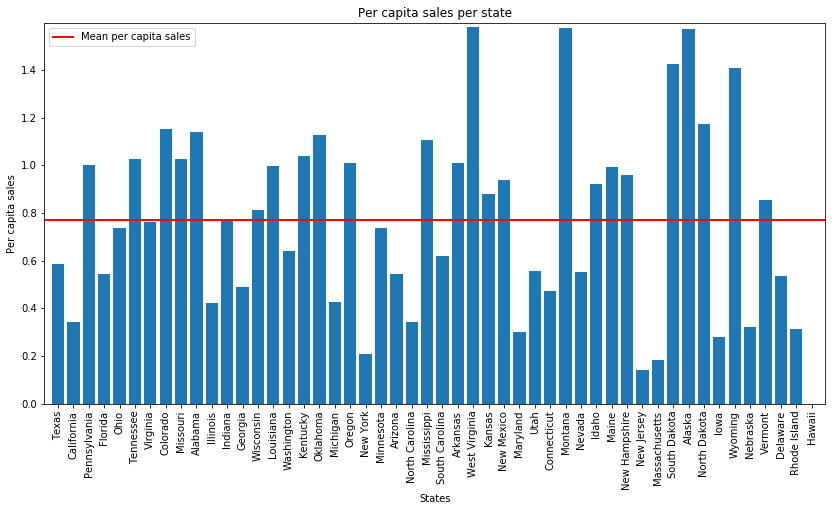

In [44]:
fig, ax = plt.subplots(figsize=(14,7))
ax.set(xlabel='States', ylabel='Per capita sales',
       title='Per capita sales per state')
xlabels = df_sales_and_census.index
ax.set_xticklabels(xlabels, rotation=90)
ax.margins(0.01, 0.01)
ax.axhline(df_sales_and_census['sales per capita'].mean(), color='red', linewidth=2, label='Mean per capita sales')
plt.legend()
ax.bar(df_sales_and_census.index, df_sales_and_census['sales per capita'])

With exception of Pennsylvania per capita arms sales in top-5 states with highest total arms sales are actually less than the mean per capita arms sales.

Next we are going to plot a bunch of scatterplots, for this let's define a helper function:

In [45]:
def plot_scatter(x, y, title):
    fig, ax = plt.subplots(figsize=(14,7))
    ax.set(xlabel=x, ylabel=y,
           title=title)
    ax.scatter(df_sales_and_census[x], df_sales_and_census[y])

### Sales per capita and median house value

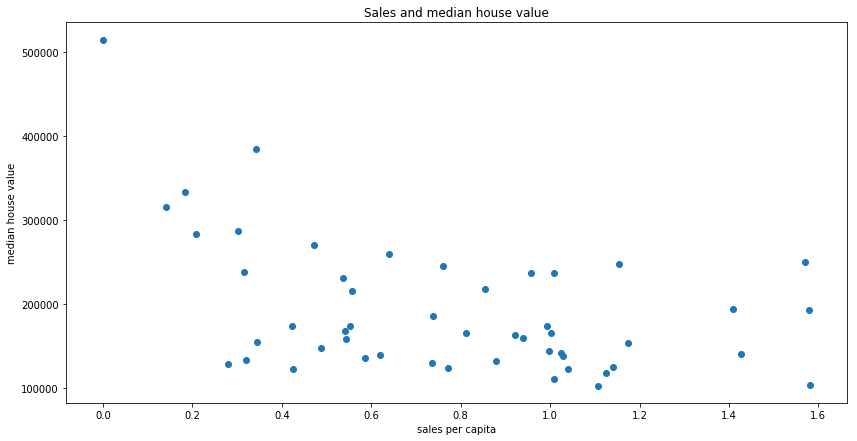

In [46]:
plot_scatter('sales per capita', 'median house value', 'Sales and median house value')

From graph above we can see some degree of negative correlation between median house value and per capita arms sales.

### Sales per capita and percent of Bachelor's degrees

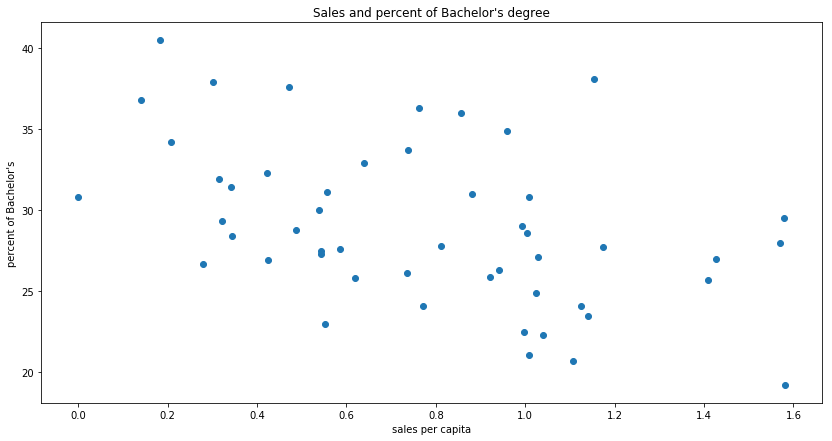

In [47]:
plot_scatter('sales per capita', "percent of Bachelor's", "Sales and percent of Bachelor's degree")

We can see somewhat negative correlation between percent of adults with Bachelor's degree and arms sales per capita.

### Sales per capita and per capita income

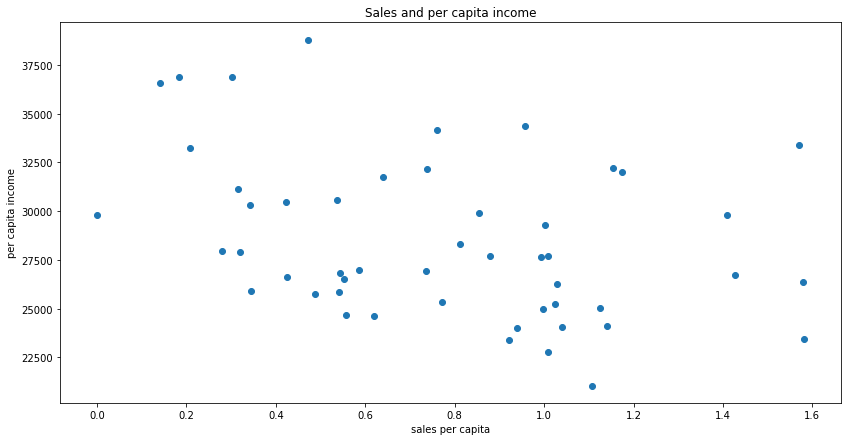

In [48]:
plot_scatter('sales per capita', 'per capita income', 'Sales and per capita income')

Again we can observe weak negative correlation between per capita income and per capita sales.

### Sales per capita and poverty

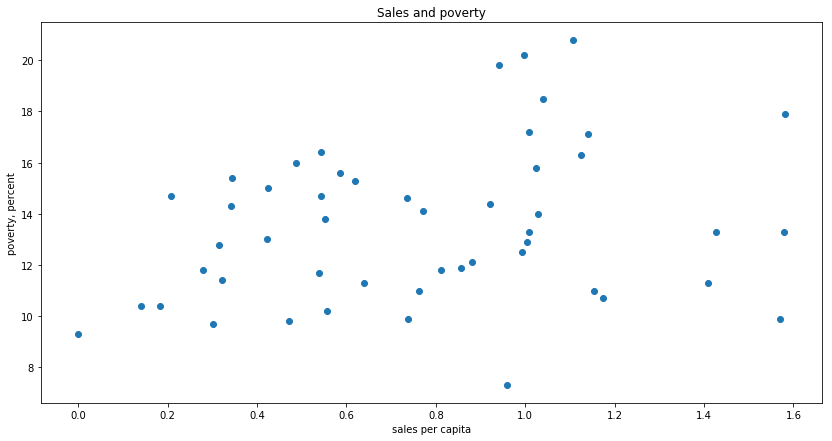

In [49]:
plot_scatter('sales per capita', 'poverty, percent', 'Sales and poverty')

Here we can see some weak positive correlation between poverty and per capita arms sales.

Let's summarize our findings by printing correlation coefficients:

In [50]:
df_sales_and_census.corr()['sales per capita']

estimated_sales         -0.023128
population              -0.380262
median house value      -0.462468
percent of Bachelor's   -0.454702
per capita income       -0.355900
poverty, percent         0.245889
sales per capita         1.000000
Name: sales per capita, dtype: float64

<a id='conclusions'></a>
## Conclusions

As we can see from our analysis the monthly arms sales in the U.S. doubled in past 20 years, we can see that general trend has three peaks (2009, 2013, 2017) probably connected to political landscape (U.S. presidential elections). Top 5 states by total arms sales (Texas, California, Pennsylvania, Florida, Ohio) account for 31.9% of total arms sales in the U.S. However per capita leaders are West Virginia, Montana, Alaska, South Dakota and Wyoming.

In terms of factors which can influence high per capita sales, we can point out that such social-economic indicators as median house value, per capita income, and percent of Bachelor's degrees have negative correlation with per capita sales i.e. states with higher income, housing value and percent of Bachelor's degree tend to have less per capita gun sales. Of course correlation does not imply causation, further research in this matter required. 

### Limitations:

In conclusion I would like to point out that this report has two major limitations:
<ol>
    <li> We used not the actual data on gun sales but estimation based on technique provided by NYT researches.</li>
    <li> Comparison of arms sales in different states may not be precise due to difference in gun laws between states.</li>
</ol>